In [32]:
import os
import re
# results_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames6'# iou = 69%
test_mask_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_masks_5m6b'
test_frame_dir = '/home/yifanc3/dataset/data/selected_128_overlap/all_frames_5m6b'
# plot_dir = '/home/yifanc3/segmentation_v2/DEM_segmentation/'


# results_dir = '/home/yifanc3/results/Model_norm/'
# test_mask_dir = '/home/yifanc3/results/resplit_orig_mask'
# plot_dir = '/home/yifanc3/segmentation_v2/DEM_segmentation/'
# results_files = os.listdir(results_dir)
masks_files = os.listdir(test_mask_dir)
masks_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])
frames_files = os.listdir(test_frame_dir)
frames_files.sort(key=lambda var:[int(x) if x.isdigit() else x 
                                for x in re.findall(r'[^0-9]|[0-9]+', var)])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
def vis(i):
#     pred = np.load(os.path.join(results_dir,results_files[i]))
#     print(pred.shape)
    orig =np.load(os.path.join(test_mask_dir,masks_files[i]))
#     orig = orig[:,:,1]
    print(orig.shape)
    frame =np.load(os.path.join(test_frame_dir,frames_files[i]))
    print(masks_files[i])
    print(frame.shape)
    fig = plt.figure()
    f = plt.figure(1)
    plt.title('mask')
    origplot = plt.imshow(orig,cmap='gray')
    g = plt.figure(2)
#     plt.title('prediction')
#     predplot = plt.imshow(pred,cmap='gray')
    a = plt.figure(3)
    plt.title('frame0')
    frame0 = plt.imshow(frame[:,:,0],cmap='gray',)
    b = plt.figure(4)
    plt.title('frame1')
    frame1 = plt.imshow(frame[:,:,1],cmap='gray')
    c = plt.figure(5)
    plt.title('frame2')
    frame2 = plt.imshow(frame[:,:,2],cmap='gray')
    d = plt.figure(6)
    plt.title('frame3')
    frame3 = plt.imshow(frame[:,:,3],cmap='gray')
    e = plt.figure(7)
    plt.title('frame4')
    frame4 = plt.imshow(frame[:,:,4],cmap='gray')
    h = plt.figure(8)
    plt.title('frame5')
    frame4 = plt.imshow(frame[:,:,5],cmap='gray')

    plt.show()

(128, 128)
157_087.npy
(128, 128, 6)


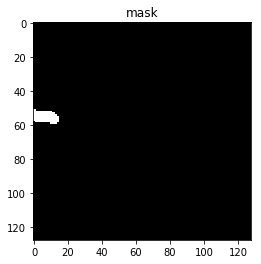

<Figure size 432x288 with 0 Axes>

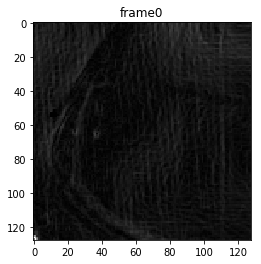

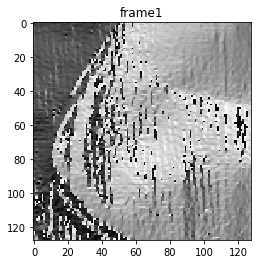

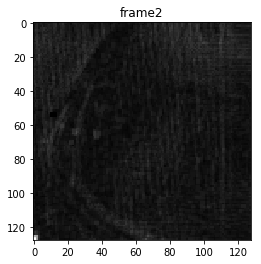

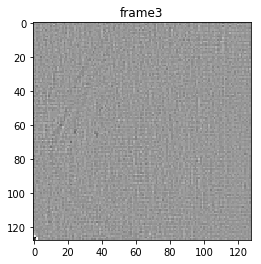

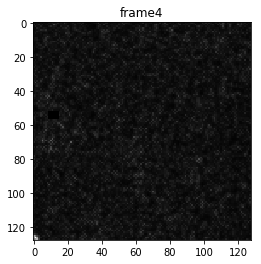

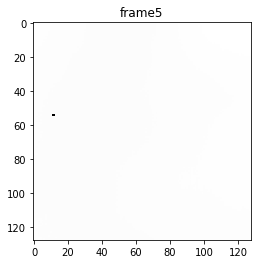

In [33]:
vis( 2220
   )

## tot = 0
for i in range(len(frames_files)):
    orig =np.load(os.path.join(test_mask_dir,masks_files[i]))
    num = np.count_nonzero(orig == 1)
    tot += num/(256*256)

In [9]:
print(len(frames_files))
print(387/tot)

774
0.5


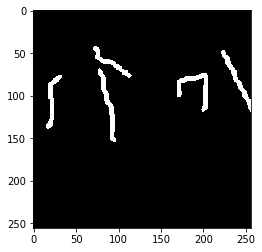

In [15]:
imgplot = plt.imshow(orig0,cmap='gray')

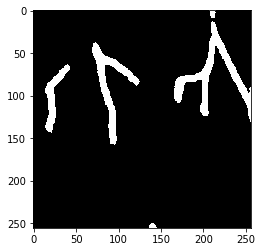

In [18]:
imgplot = plt.imshow(pred0,cmap='gray')

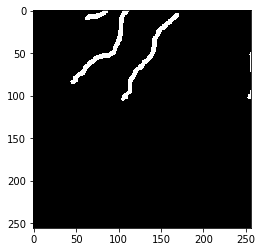

In [19]:
imgplot = plt.imshow(orig1,cmap='gray')

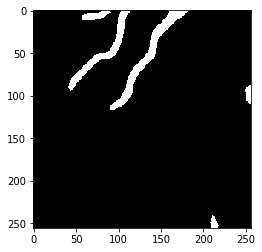

In [20]:
imgplot = plt.imshow(pred1,cmap='gray')

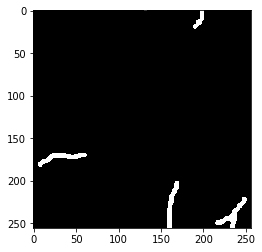

In [21]:
imgplot = plt.imshow(orig2,cmap='gray')

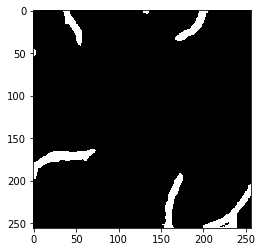

In [22]:
imgplot = plt.imshow(pred2,cmap='gray')

# Plot

In [67]:
img_iou=mpimg.imread(os.path.join(plot_dir,'Mean_IoU.png'))
img_loss=mpimg.imread(os.path.join(plot_dir,'loss.png'))

(-0.5, 639.5, 479.5, -0.5)

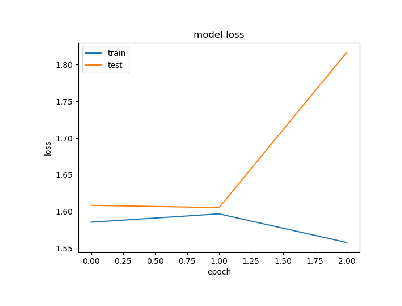

In [66]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
imgplot = plt.imshow(img_loss)
plt.axis('off')